Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 1690)              0         
                                                                 
 dense_12 (Dense)            (None, 512)               865792    
                                                                 
 dropout_6 (Dropout)         (None, 512)               0         
                                                                 
 dense_13 (Dense)            (None, 256)               131328    
                                                                 
 dropout_7 (Dropout)         (None, 256)               0         
                                                                 
 dense_14 (Dense)            (None, 64)                16448     
                                                                 
 dropout_8 (Dropout)         (None, 64)               

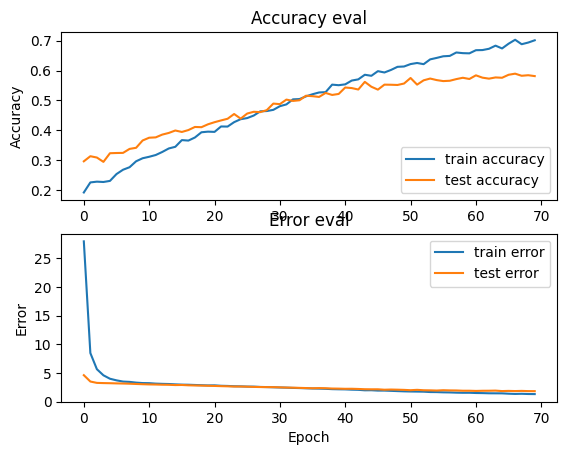

In [5]:
import json
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow import keras
import matplotlib.pyplot as plt

# Path to the dataset file
DATASET_PATH = "data.json"

def load_data(dataset_path):

    with open(dataset_path, "r") as fp:
        data = json.load(fp)
    inputs = np.array(data["mfcc"])
    targets = np.array(data["labels"])

    return inputs, targets

def plot_history(history):
    """
    Visualizes the training progress of a neural network model.

    Parameters:
    - history: Object returned by the `fit` method of a Keras model.
    This object should contain training and validation metrics for each epoch.

    Returns:
    None. Displays two subplots:
    1. Accuracy Evaluation:
        - X-axis: Epochs
        - Y-axis: Accuracy
        - Blue Line: Training accuracy over epochs.
        - Orange Line: Validation (test) accuracy over epochs.
        - Legend: Displays labels for training and validation accuracy.
        - Title: "Accuracy eval"

    2. Error (Loss) Evaluation:
        - X-axis: Epochs
        - Y-axis: Error (Loss)
        - Blue Line: Training loss over epochs.
        - Orange Line: Validation (test) loss over epochs.
        - Legend: Displays labels for training and validation loss.
        - Title: "Error eval"

    Usage:
    To use this function, first train a Keras model and obtain the `history` object from the `fit` method.
    Then, call this function by passing the `history` object as an argument:
    """

    fig, axs = plt.subplots(2)

    # create the accuracy subplot
    axs[0].plot(history.history["accuracy"], label="train accuracy")
    axs[0].plot(history.history["val_accuracy"], label="test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")

    # create the error subplot
    axs[1].plot(history.history["loss"], label="train error")
    axs[1].plot(history.history["val_loss"], label="test error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")

    plt.show()

if __name__ == "__main__":
    # Load the dataset
    inputs, targets = load_data(DATASET_PATH)

    # Split data into training and testing sets (70% training, 30% testing)
    inputs_train, inputs_test, targets_train, targets_test = \
        train_test_split(inputs, targets, test_size=0.3)

    # Build the neural network architecture
    model = keras.Sequential([
        # Input layer: Flatten the input to be fed into the dense layers
        keras.layers.Flatten(input_shape=(inputs.shape[1], inputs.shape[2])),
        # 1st hidden layer with 512 neurons and ReLU activation function
        keras.layers.Dense(512, activation="relu", kernel_regularizer=keras.regularizers.l2(0.001)),
        keras.layers.Dropout(0.3),
        # 2nd hidden layer with 256 neurons and ReLU activation function
        keras.layers.Dense(256, activation="relu", kernel_regularizer=keras.regularizers.l2(0.001)),
        keras.layers.Dropout(0.3),
        # 3rd hidden layer with 64 neurons and ReLU activation function
        keras.layers.Dense(64, activation="relu",kernel_regularizer=keras.regularizers.l2(0.001)),
        keras.layers.Dropout(0.3),
        # Output layer with 10 neurons (one for each genre) using softmax activation
        keras.layers.Dense(10, activation="softmax")
    ])

    # Compile the model using Adam optimizer and a learning rate of 0.0001
    optimizer = keras.optimizers.Adam(learning_rate=0.0001)
    model.compile(
        optimizer=optimizer,
        loss="sparse_categorical_crossentropy", # Suitable loss function for classification
        metrics=["accuracy"] # Track accuracy during training
    )

    # Print the summary of the model architecture
    model.summary()

    # Train the model using the training data
    history = model.fit(
        inputs_train,
        targets_train,
        validation_data=(inputs_test, targets_test), # Validate on the test set
        epochs=70, # Train for 50 epochs
        batch_size=32 # Use a batch size of 32
    )

    #plot accuracy and error over the epochs
    plot_history(history)